In [2]:
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define parameters and scattering angle
g = [0, 0.3, 0.5, 0.8, 0.9, 0.95]
#g = np.round(np.arange(-0.9, 1.0, 0.1), 2)
phi = np.linspace(-np.pi, np.pi, 5000)

# Define Henyey-Greenstein scattering function
p = []
for i in range(len(g)):
    p.append((1 - g[i]**2)/(1 + g[i]**2 - 2*g[i]*np.cos(phi))**(3/2))

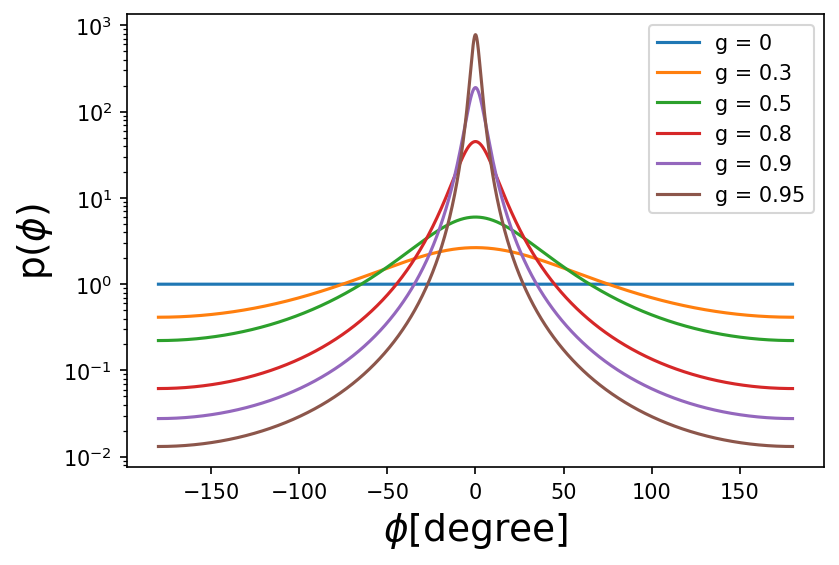

In [5]:
# Plot
plt.figure()
plt.xlabel(r'$\phi$[degree]', fontsize=18)
plt.ylabel(r'p($\phi$)', fontsize=18)
plt.yscale('log')
for j in range(len(g)):
    plt.plot(phi/np.pi*180, p[j], label='g = ' + str(g[j]))
plt.legend()
plt.savefig('HG_function')

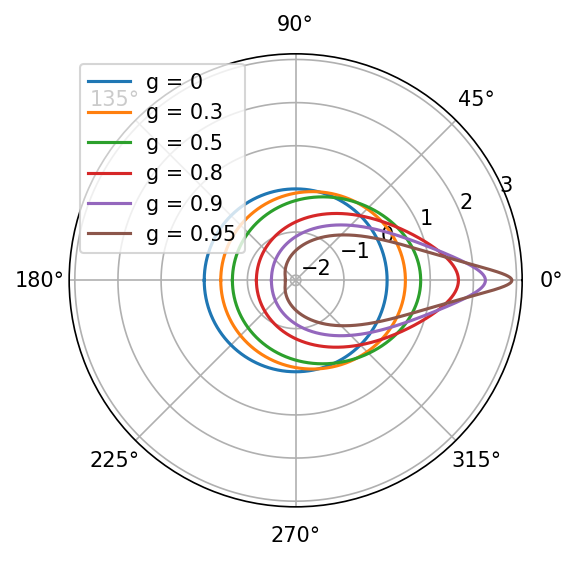

In [40]:
plt.figure()
for j in range(len(g)):
    plt.polar(phi, np.log10(p[j]), label='g = ' + str(g[j]))
plt.legend()
#plt.savefig('HG_polar')

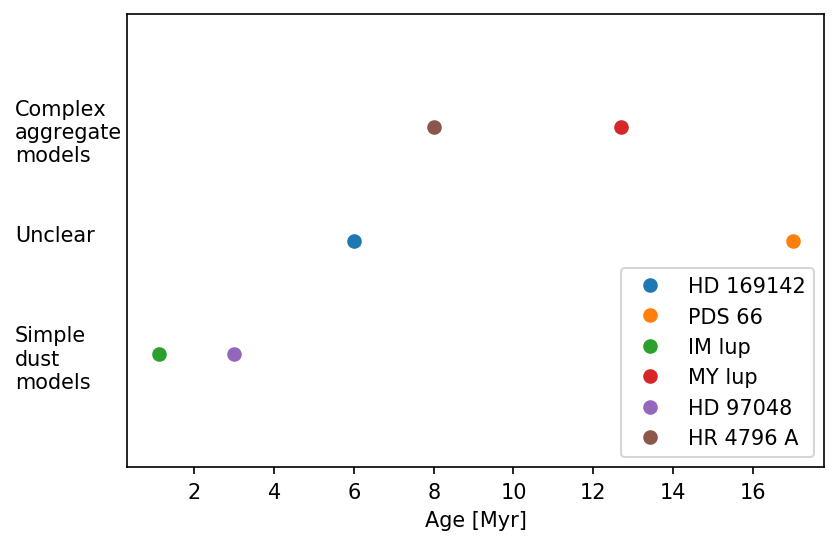

In [118]:
age = [6, 17, 1.1, 12.7, 3, 8]
hd169142 = 6
pds66 = 6
imlup = 5
mylup = 7
hd97048 = 5
hr4796a = 7

plt.figure()
plt.xlabel('Age [Myr]', fontsize=10)
plt.text(-2.5, 6.7, 'Complex\naggregate\nmodels')
plt.text(-2.5, 4.7, 'Simple\ndust\nmodels')
plt.text(-2.5, 6, 'Unclear')
plt.ylim(4,8)

plt.plot(age[0], hd169142, 'o', label='HD 169142')
plt.plot(age[1], pds66, 'o', label='PDS 66')
plt.plot(age[2], imlup, 'o', label='IM lup')
plt.plot(age[3], mylup, 'o', label='MY lup')
plt.plot(age[4], hd97048, 'o', label='HD 97048')
plt.plot(age[5], hr4796a, 'o', label='HR 4796 A')

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.legend(loc='lower right')
plt.savefig('age_correlation')

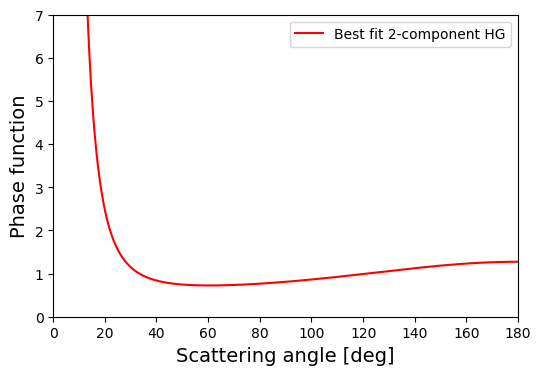

In [25]:
g1 = 0.99
g2 = -0.14
w1 = 4.0
w2 = 0.82
g = -0.9
phi = np.linspace(0, 180, 1000)

def hg(g, phi):
    p = (1 - g**2)/(1 + g**2 - 2*g*np.cos(phi*np.pi/180))**(3/2)
    return p
#plt.figure()
#plt.plot(phi, hg(g,phi))
#plt.yscale('log')

def hg2(g1, w1, g2, w2, phi):
    p2 = w1*hg(g1, phi) + w2*hg(g2, phi)
    return p2

plt.figure(dpi=100)
plt.plot(phi,hg2(g1, w1, g2, w2, phi), '-r', ms=1, label='Best fit 2-component HG')
plt.xlim(0, 180)
plt.ylim(0,7)
plt.xlabel('Scattering angle [deg]', fontsize=14)
plt.ylabel('Phase function', fontsize=14)
#plt.grid()
plt.legend()
plt.savefig('HG2_function')